<a href="https://colab.research.google.com/github/ABenatti/-Reaction-Diffusion-System-Simulation/blob/master/Belousov_Zhabotinsky_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belousov-Zhabotinsky Simulation

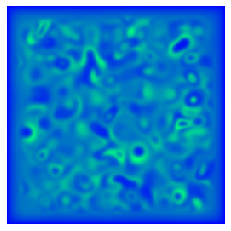

In [3]:
#Belousov-Zhabotinsky Simulation

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from random import uniform


def dX_dt(f):
    df = DX*convolve2d(f, maske, mode="same") + k1*Y - k3*Z
    return df

def dY_dt(f):
    df = DY*convolve2d(f, maske, mode="same") + k2*Z - k1*X
    return df

def dZ_dt(f):
    df = DZ*convolve2d(f, maske, mode="same") + k3*X - k2*Y 
    return df

maske = np.array([[0, 1, 0], 
                  [1, -4, 1], 
                  [0, 1, 0]])


#parameters setting
k1 = 0.4
k2 = 0.9
k3 = 0.9


DX, DY, DZ = 0.7, 0.001, 0.001      #diffusion coefficients
L = 256                             #fig dimention

X = np.zeros((L, L))
X2 = np.zeros((L, L))
Y = np.zeros((L, L))
Y2 = np.zeros((L, L))
Z = np.zeros((L, L))
Z2 = np.zeros((L, L))

#initial condition
for x in range(L):
    for y in range(L):
        X[x, y] = 1. + uniform(-0.9, 0.) # small noise is added
        Y[x, y] = 1. + uniform(-0.9, 0.) # small noise is added
        Z[x, y] = 1. + uniform(-0.9, 0.) # small noise is added


iterations = 6000      #number of iterarion 
dt = 0.2                #step
for i in range(iterations):
    if i % 2 == 0:
        X2[:] = X*(1 + dX_dt(X)*dt)
        Y2[:] = Y*(1 + dY_dt(Y)*dt)
        Z2[:] = Z*(1 + dZ_dt(Z)* dt)
    else:
        X[:] = X2*(1 + dX_dt(X2)* dt)
        Y[:] = Y2*(1 + dY_dt(Y2)* dt)
        Z[:] = Z2*(1 + dZ_dt(Z2)* dt) 


#show the image
fig, ax = plt.subplots()
ax.imshow(Z, cmap= 'winter')
ax.set_axis_off()

## License

This work is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 (CC BY-NC-ND 4.0) International License.